量子ソフトウェア勉強会:「量子インスパイアード古典アルゴリズム」ハンズオン資料 3  
2023年9月20日(水)  
高比良宗一（名城大学情報工学部情報工学科）
$$
\newcommand{\norm}[1]{\lVert#1\rVert}
\renewcommand{\top}{\mathsf{T}}
\newcommand{\SQ}{\mathrm{SQ}}
$$
# $x = A^+ b$に関する量子インスパイアード古典アルゴリズム Part 2 

### (行列$C$の特異値分解の後)

このノートブックでは，量子インスパイアード古典アルゴリズムにおける，$A$から構成される行列$C$の特異値分解の結果を得た後の部分について実装します．

In [178]:
import random
import cmath, math
import time
import numpy as np
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt

from quantum_inspired import MatrixBasedDataStructure
from quantum_inspired import construct_R, qi_svd, low_rank_matrix

## 行列$A$とベクトル$b$を定義する

In [324]:
m, n = 8, 16
A = low_rank_matrix(m, n, 2, 5)

exact_U, exact_S, exact_Vh = np.linalg.svd(A)
exact_V = exact_Vh.T
exact_S[:2]


b = np.random.rand(m)
b = b/np.linalg.norm(b)
print("Aのランク\n", np.linalg.matrix_rank(A))
print("Aのフロべニウスノルム\n", np.linalg.norm(A))
print("Aの特異値\n", sp.linalg.svdvals(A))

Aのランク
 2
Aのフロべニウスノルム
 1.019803902718557
Aの特異値
 [1.00000000e+00 2.00000000e-01 1.67908272e-16 2.98375394e-17
 2.52902526e-17 1.77019006e-17 7.74774146e-18 4.77261502e-18]


行列$A$の特異値分解の結果を保存しておきます．

In [325]:
exact_U, exact_S, exact_Vh = np.linalg.svd(A)
exact_V = exact_Vh.T
exact_S[:2]

array([1. , 0.2])

解ベクトル$x = A^+b$は，NumPyの`pinv`または`lstsq`を用いて次のようにして得ることができます．

In [326]:
x  = np.linalg.pinv(A) @ b
x_ = np.linalg.lstsq(A, b)[0]
x, x_

/Users/takahira/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([ 0.56206703,  0.24009411, -0.01203472,  0.38808847, -0.51127657,
        -0.19467505,  0.38614959, -0.69783124, -0.03046933, -0.37373618,
        -0.03402853,  0.2976032 ,  1.50894295,  0.77235867, -0.56817388,
        -0.10994197]),
 array([-9.36760289e+14, -3.43783041e+13, -7.50947472e+13, -2.47231074e+14,
        -5.09813618e+13, -9.45237328e+13,  3.88576318e+13, -2.95068253e+14,
        -2.63409408e+11, -5.58462608e+12, -1.44999642e+14,  2.02130075e+13,
         2.00216706e+14,  3.83210589e+13, -3.22268980e+13, -1.24769581e+13]))

# $\mathrm{SQ}(A)$と$\mathrm{Q}(b)$を定義する．
以下のセルで，`MatrixBasedDataStructure`を用いて行列に基づくデータ構造$\SQ(A)$を用意します．$\mathrm{Q}(b)$は$\mathrm{Query}(i)$のみだけなので，`VectorBasedDataStructure`を使う必要はなく，`b`をそのまま使うだけで十分です．

In [327]:
from quantum_inspired import MatrixBasedDataStructure

SQA = MatrixBasedDataStructure(A)
SQA.sample1(), SQA.sample2(0), SQA.query(0, 0), SQA.norm(0), SQA.normF()

(4, 0, 0.1109045131629001, 0.295949597594083, 1.019803902718557)

# 前のノートブックの復習
前のノートブックで$C$の特異値分解までを実装しました．$\mathrm{SQ}(A)$と$r,c$を渡すことで，$R$を表す行添字$i_0,i_1,\dots,i_{r-1}$と$C$の左特異ベクトル$w^{(\ell)}$と特異値$\tilde{\sigma}_\ell$が返ってくることを再度確認します．

In [328]:
r, c = 100, 100
row_indices, W, S = qi_svd(SQA, r, c)
print("{i_0,...i_r-1} = \n", row_indices)
print("Cの左特異ベクトル =\n", W)
print("Cの特異値 =\n", S)

{i_0,...i_r-1} = 
 [6, 4, 0, 7, 7, 7, 2, 6, 6, 3, 7, 0, 5, 7, 3, 7, 7, 5, 0, 7, 7, 7, 3, 4, 4, 0, 6, 0, 1, 1, 3, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 6, 3, 7, 6, 0, 7, 4, 0, 7, 0, 7, 7, 6, 7, 7, 7, 5, 5, 7, 5, 3, 7, 7, 7, 5, 4, 7, 7, 6, 6, 7, 3, 0, 7, 7, 6, 7, 0, 7, 6, 3, 7, 4, 0, 7, 6, 5, 2, 3, 7, 4, 0, 7, 7, 3, 2, 2]
Cの左特異ベクトル =
 [[-9.62349434e-02 -1.40487908e-01  9.62711239e-01 ...  1.74787269e-05
  -4.65690811e-05  5.65984500e-02]
 [-1.00651819e-01 -5.46311690e-02 -1.20247501e-01 ...  1.38992743e-05
  -3.70322412e-05 -1.12468396e-01]
 [-1.02089037e-01  1.35429170e-02 -4.05827031e-02 ...  1.27784174e-02
   7.21935380e-03  1.06159137e-01]
 ...
 [-1.00968105e-01 -4.48551907e-02 -7.19961093e-03 ...  8.17095798e-04
  -2.17701213e-03  1.93040947e-01]
 [-8.97552897e-02 -2.15625953e-01 -3.81545759e-02 ...  2.49380968e-03
   2.97843657e-03 -1.29656744e-01]
 [-8.97552897e-02 -2.15625953e-01 -3.81545759e-02 ... -2.16336416e-03
  -3.85885219e-03 -1.29656744e-01]]
Cの特異値 =
 [1.00262240e+00 1.8640

# $\mathrm{SQ}(x)$の$\mathrm{Query}(k)$について

### $R_{\ast,k}$の構成
$\SQ(x)$の$\mathrm{Query}(k)$，すなわち$x$の第$k$成分について考察します．
ベクトル$x$の第$k$成分は次式のようにして書くことができます．
$$
x \approx \tilde{x}  = \frac{1}{\tilde{\sigma}_k}  R_{\ast, k}^\top  w
$$
ここで
$$
w = 
\frac{\tilde{\lambda}_1}{\tilde{\sigma}_1^3}\tilde{w}^{(1)} + \frac{\tilde{\lambda}_2}{\tilde{\sigma}_2^3}\tilde{w}^{(2)}+ \dots + \frac{\tilde{\lambda}_r}{\tilde{\sigma}_r^3}\tilde{w}^{(r)} 
$$
です．$R$の$s$行目が
$$
 R_{s,\ast} = \frac{\lVert A \rVert_\mathrm{F}}{\sqrt{r}} \frac{A_{i_s,\ast}}{\lVert A_{i_s,\ast}\rVert}
$$
のように定義されたことを思い出すと，$R_{\ast, k}$は次式のように書くことができます．
$$
 R_{\ast, k} = \frac{\lVert A \rVert_\mathrm{F}}{\sqrt{r}} 
 \begin{bmatrix}
     \frac{A_{i_1, k}}{\lVert A_{i_1,\ast} \rVert} \\
     \frac{A_{i_2, k}}{\lVert A_{i_2,\ast} \rVert} \\
     \vdots \\
     \frac{A_{i_r, k}}{\lVert A_{i_r,\ast} \rVert}\\
 \end{bmatrix}
$$
まずは，この式に基づいて$R_{\ast,k}$を構成する関数を下のセルで定義します：

In [329]:
def R_col(SQA, k, row_indices):
    r = len(row_indices)
    Rk = np.zeros(r)
    for s in range(r):
        i_s = row_indices[s]
        Rk[s] = SQA.query(i_s, k)/SQA.norm(i_s)
    return (SQA.normF()/math.sqrt(r)) * Rk

$R_{\ast,k}$が正しく作れているか確認してみます．

In [330]:
r, c = 10, 10
row_indices, W, S = qi_svd(SQA, r, c)

k = 9
R  = construct_R(SQA, A, row_indices)
Rk = R_col(SQA, k, row_indices)

print(f"Rの第{k}列目:\n", R[:,k])
print(f"R_*,{k}\n",Rk)
np.allclose(R[:,k], Rk)

Rの第9列目:
 [0.01819629 0.03465237 0.03465237 0.02259931 0.03465237 0.03465237
 0.03465237 0.01819629 0.03465237 0.01819629]
R_*,9
 [0.01819629 0.03465237 0.03465237 0.02259931 0.03465237 0.03465237
 0.03465237 0.01819629 0.03465237 0.01819629]


True

### $\tilde{\lambda}_\ell = \mathrm{Tr}(A^\dagger (b\tilde{v}^{(\ell) \dagger}))$の推定
次に$\tilde{\lambda}_\ell= \mathrm{Tr}(A^\dagger (b\tilde{v}^{(\ell) \dagger})) $を推定する関数を実装します．

In [331]:
def estimate_lambda(SQA, b, row_indices, W, S, ell, sample_size=100):    
    lam = 0
    for _ in range(sample_size):
        # A
        i = SQA.sample1()
        j = SQA.sample2(i)
        Aij = SQA.query(i,j)

        # B
        Rj = R_col(SQA, j, row_indices) 
        vj = (1/S[ell]) * np.vdot(Rj, W[:, ell])
        Bij = b[i]*vj

        # Zij 
        Zij =  Bij/Aij 
        
        lam += Zij
    lam = lam/sample_size
    return lam * SQA.normF()**2


$\lambda_\ell$を推定できているか確認してみます：

In [332]:
print("exact:")
exact_lambda0 = np.vdot(exact_V[:, 0], A.T @ b)
exact_lambda1 = np.vdot(exact_V[:, 1], A.T @ b)
print("λ0=", exact_lambda0) 
print("λ1=", exact_lambda1)

print("\napproximation:")
r, c = 100, 100
row_indices, W, S = qi_svd(SQA, r, c)
est_lambda0 = estimate_lambda(SQA, b, row_indices, W, S, 0, 100)
est_lambda1 = estimate_lambda(SQA, b, row_indices, W, S, 1, 3000)
print("λ0=", est_lambda0)
print("λ1=", est_lambda1)

print("\nerror:")
print(exact_lambda0 - est_lambda0)
print(exact_lambda1 - est_lambda1)
# print((exact_lambda0 - est_lambda0)/exact_lambda0)
# print((exact_lambda1 - est_lambda1)/exact_lambda1)

exact:
λ0= -0.814616577964749
λ1= -0.08231444269573662

approximation:
λ0= -0.8277991056224335
λ1= 0.07071649370986763

error:
0.013182527657684573
-0.15303093640560425


### $w$を構成する．
$\tilde{\lambda}_\ell$を推定する関数を用いて，
$$
w = 
\frac{\tilde{\lambda}_1}{\tilde{\sigma}_1^3}\tilde{w}^{(1)} + \frac{\tilde{\lambda}_2}{\tilde{\sigma}_2^3}\tilde{w}^{(2)}+ \dots + \frac{\tilde{\lambda}_r}{\tilde{\sigma}_r^3}\tilde{w}^{(r)} 
$$
を構成する関数を以下のセルで定義します．

In [333]:
def construct_w(SQA, b, row_indices, W, S, rank, lambda_sample_size=100):
    lams = [0]*rank
    for i in range(rank):        
        lams[i] = estimate_lambda(SQA, b, row_indices, W, S, i, lambda_sample_size)
    w = sum(lams[i] * W[:,i]/S[i]**3 for i in range(rank))
        
    return w

$w$と`col_R`によって得られた$R_{\ast,k}$と内積を取って，
$\tilde{x}_k = e_k^\top R^\top w = R_{\ast,k}^\top w$を計算する関数を下のセルで定義します．

In [334]:
def SQx_query(SQA, k, row_indices, w):
    Rk = R_col(SQA, k, row_indices)
    return np.vdot(Rk, w)

この関数`construct_w`を使って$w$を構成し，`SQx_query`と合わせて計算できているか確認してみます．

In [335]:
r, c = 100, 100
row_indices, W, S = qi_svd(SQA, r, c)
w = construct_w(SQA, b, row_indices, W, S, 2, 1000)
val = SQx_query(SQA, 1, row_indices, w)

print("SQ(x) query(1) =", val)
print("exact =", x[1])

SQ(x) query(1) = 2.7297614080469628
exact = 0.24009411071851006


$\tilde{x} = (x_0,\dots,x_{n-1})$を構成し，$x = A^+b$と比較をしてみます．

In [336]:
r, c = 1000, 1000
row_indices, W, S = qi_svd(SQA, r, c)
w = construct_w(SQA, b, row_indices, W, S, 2, 1000)
tilde_x = tilde_x = np.array([SQx_query(SQA, k, row_indices, w) for k in range(n)])
print("exact x:\n", x)
print("tilde x:\n", tilde_x)
print("relative error =", np.linalg.norm(tilde_x - x)/ np.linalg.norm(x))

exact x:
 [ 0.56206703  0.24009411 -0.01203472  0.38808847 -0.51127657 -0.19467505
  0.38614959 -0.69783124 -0.03046933 -0.37373618 -0.03402853  0.2976032
  1.50894295  0.77235867 -0.56817388 -0.10994197]
tilde x:
 [ 0.70117502  0.33562345  0.04355428  0.71526907 -0.79921548 -0.22163797
  0.5080238  -0.88646637 -0.04591551 -0.56876387  0.03787303  0.45879089
  2.15538181  0.98493529 -0.84373965 -0.16237684]
relative error = 0.4247833106051156



次に，$\tilde{x}$と$x$との誤差がサンプリング数を増やすと減少することを確認してみます．

In [337]:
rs = [2**i for i in range(1, 10)]
cs = [2**i for i in range(1, 10)]

hist = []

sample_size = 5

for r, c in zip(rs, cs):
    mean = 0
    for _ in range(sample_size):
        row_indices, W, S = qi_svd(SQA, r, c)
        w = construct_w(SQA, b, row_indices, W, S, 2, 100)
        tilde_x = np.array([SQx_query(SQA, k, row_indices, w) for k in range(n)])    
        mean += np.linalg.norm(tilde_x - x)
    mean = mean/sample_size
    
    hist.append(mean)

/Users/takahira/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/takahira/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


[nan, 97.59715359977743, 122.18443687222172, 25.702572270322047, 9.062091361330115, 4.018066440121322, 2.0314723297229538, 5.652620088169565, 4.154287290417791]


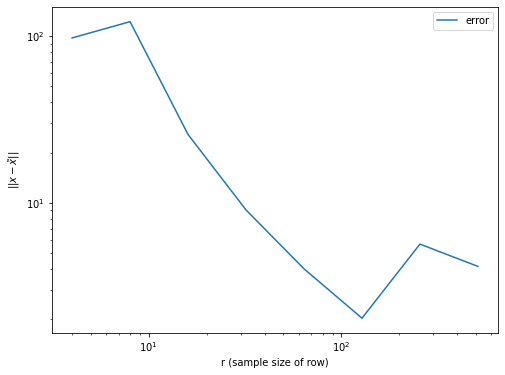

In [338]:
print(hist)
plt.figure(figsize=(8, 6))
plt.plot(rs, hist, label="error")
plt.xlabel("r (sample size of row)")
plt.ylabel(r"$||x - \tilde{x}||$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

# $\mathrm{SQ}(x)$の$\mathrm{Sample}()$について
$\mathrm{SQ}(x)$の$\mathrm{Sample}()$について考察します．
$\mathrm{Sample}()$は下記の手順によって実現できることを思い出すと，次のセルのようにして実装できます．
1. 確率$|w_s|^2/\norm{w}^2$で$s$をサンプリングする．
2. 確率$|A_{i_s,j}|^2/\norm{A_{i_s,\ast}^2}$で$j$をサンプリングする
3. 
$
 r_j = \frac{|\tilde{x}_j|^2}{\norm{A}_\mathrm{F}^2 \sum_{s=0}^{r-1}(w_s A_{i_s, j}/\norm{A_{i_s,\ast}})^2} 
$
を計算する．
4. 0から1の一様乱数$y$を生成し，$y < r_j$ならば「受理」として$j$を出力，$y \ge r_j$ならば1から再スタートする．


In [339]:
def SQx_sample(SQA, w, row_indices, W, S):
    r = len(w)

    normw2 = np.linalg.norm(w)**2
    prob_   = [w[s]**2/normw2 for s in range(r)]
    
    accept = False
    while not accept : 
        
        # 提案分布
        s_ = np.random.choice(range(r), 1, p=prob_)[0]   
        i_s = row_indices[s_]
        j = SQA.sample2(i_s)

        xj = x[j]
        # xj = SQx_query(SQA, j, row_indices, w)

        # rj を計算する
        temp = 0
        for s in range(r):
            i_s = row_indices[s]
            temp += (w[s] * SQA.query(i_s, j)/SQA.norm(i_s))**2
        rj = xj**2 / (SQA.normF()**2 * temp)
        
        y = random.random()
        if y < rj : 
            accept = True
            
    return j


上記の関数の出力結果が確率分布$D_x (\Pr(j) = |x_j|^2/\norm{x}^2)$に従うか確認してみます：

In [340]:
x = np.linalg.pinv(A) @ b
normx = np.linalg.norm(x, 2)
Dx = [abs(x[i])**2/normx**2 for i in range(n)]

In [359]:
r, c = 1000, 1000
row_indices, W, S = qi_svd(SQA, r, c)
w  = construct_w(SQA, b, row_indices, W, S, 2, 1000)

num_shots = 100

counts = np.zeros(n)
for _ in range(num_shots):
    i = SQx_sample(SQA, w, row_indices, W, S) 
    counts[i] += 1

print(counts/num_shots - Dx)

[-2.44944961e-02  1.82318161e-02 -2.95677380e-05 -1.07473660e-02
  2.66347903e-02  2.26309900e-03  2.95590923e-02  4.05860693e-02
 -1.89527447e-04  1.48477986e-03 -2.36392039e-04  1.91903462e-03
 -4.48277788e-02 -2.17823883e-02 -1.59035723e-02 -2.46759274e-03]


In [360]:
np.linalg.norm(counts/num_shots - Dx)

0.08385930314180226

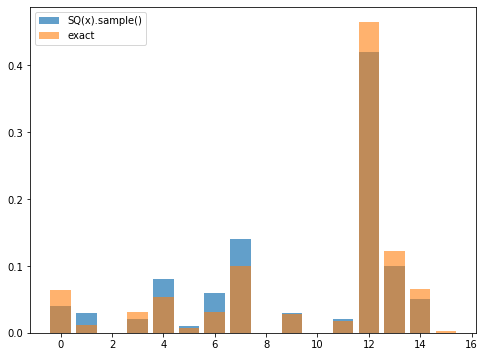

In [361]:
plt.figure(figsize=(8,6))
plt.bar(range(n), counts/num_shots, alpha=0.7, label="SQ(x).sample()")
plt.bar(range(n), Dx,               alpha=0.6, label="exact")
plt.legend()
plt.show()

サンプル数($\SQ(x)$の$\mathrm{Sample}()$の呼び出し回数)を増やしてみて，誤差が小さくなっていくことを確認してみます．一様ランダムにサンプリングした時の結果と比べてみてみます．

In [377]:
import random
r, c = 1000, 1000
row_indices, W, S = qi_svd(SQA, r, c)
w  = construct_w(SQA, b, row_indices, W, S, 2, 100)

# print(sample_size, np.linalg.norm(counts/sample_size - Dx))

# ---------------------------------------------

hist_uniform = []
hist_sqxsample = []

for num_shots in [2**i for i in range(1, 10)]:

    counts_uniform = np.zeros(n)
    counts_sqxsample = np.zeros(n)

    for _ in range(num_shots):
        i = random.randint(0, n-1) 
        counts_uniform[i] += 1

        i = SQx_sample(SQA, w, row_indices, W, S) 
        counts_sqxsample[i] += 1
        
    hist_uniform.append(np.linalg.norm(Dx - counts_uniform/num_shots, 1))
    hist_sqxsample.append(np.linalg.norm(Dx - counts_sqxsample/num_shots, 1))

In [378]:
hist_uniform, hist_sqxsample

([1.9795910125325353,
  1.6622353292156404,
  1.3547666985631897,
  1.1870388605763613,
  1.1913553402015982,
  1.0010371877093074,
  1.0439231955997017,
  1.1145747517724383,
  1.0117505823112038],
 [1.034182511612626,
  0.8715165809975999,
  0.9047856800927231,
  0.5029914086335496,
  0.2998524229877776,
  0.25527245627203365,
  0.13967943369629343,
  0.11513034359018359,
  0.13477077353680234])

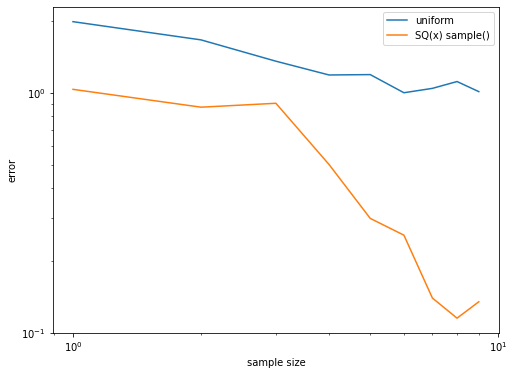

In [383]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), hist_uniform, label="uniform")
plt.plot(range(1, 10), hist_sqxsample, label="SQ(x) sample()")

plt.xlabel("sample size")
plt.ylabel(r"error")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

# $\mathrm{SQ}(x)$の$\mathrm{Norm}()$について
## 棄却サンプリングの受理確率の推定
$\mathrm{SQ}(x)$の$\mathrm{Norm}()$について実装します．
$\mathrm{Sample}()$における棄却サンプリングの「受理」する確率は
$$
 \frac{\norm{\tilde{x}}^2}{\norm{A}_\mathrm{F}^2 \norm{w}^2}
$$
です．したがって，ノルム$\norm{x}$の推定は，受理する確率を推定し，$\norm{A}_\mathrm{F}^2\norm{w}^2$を掛ければ良いことがわかります．
実装は下記のようになります．

In [384]:
def _SQx_norm(SQA, w, row_indices):
    r = len(w)

    normw2 = np.linalg.norm(w)**2
    prob_   = [w[s]**2/normw2 for s in range(r)]
    
    s   = np.random.choice(range(r), 1, p=prob_)[0]   
    i_s = row_indices[s]
    j   = SQA.sample2(i_s)

    xj = x[j]
    # xj =  SQx_query(SQA, j, row_indices, w)
    
    
    temp = 0
    for s in range(r):
        i_s = row_indices[s]
        temp += (w[s] * SQA.query(i_s, j)/SQA.norm(i_s))**2
    rj = xj**2 / (SQA.normF()**2 * temp)

    y = random.random()
    if y < rj : 
        return 1
    else:
        return 0

def SQx_norm(SQA, w, row_indices, norm_sample_size=100):
    normw2 = np.linalg.norm(w)**2
    normAF2 = SQA.normF()**2
    cnt = sum(_SQx_norm(SQA, w, row_indices) for _ in range(norm_sample_size))
    val = cnt/norm_sample_size
    return math.sqrt(val * normAF2 * normw2)
    

In [385]:
r, c, = 1000, 1000
row_indices, W, S = qi_svd(SQA, r, c)
w  = construct_w(SQA, b, row_indices, W, S, 2, 1000)
SQx_norm(SQA, w, row_indices, 100), np.linalg.norm(x)

(1.4765651816322898, 2.213231199352785)

In [390]:
r, c, = 1000, 1000
row_indices, W, S = qi_svd(SQA, r, c)
w  = construct_w(SQA, b, row_indices, W, S, 2, 1000)

hist = []

for sample_size in [2**i for i in range(2, 12)]:
    val = SQx_norm(SQA, w, row_indices, sample_size)
    hist.append(val)

hist

[0.0,
 4.546617386600984,
 3.9374861580844662,
 1.6074719927631071,
 1.9687430790422331,
 2.273308693300492,
 1.9687430790422331,
 2.343272965528198,
 2.237506318888447,
 2.2193885606357435]

# まとめ
$\mathrm{SQ}(x)$の$\mathrm{Query}(), \mathrm{Sample}(), \mathrm{Norm}()$について実装しました．最後にクラスを使ってまとめます．
<!-- 各関数で$w$(`w`)や$i_0,\dots,i_{r-1}$(`row_indices`)など共通した引数がありました．そこでクラスを -->

In [393]:
class SQx:
    def __init__(self, SQA, b, r, c, rank=2, lambda_sample_size=100):   
        self.SQA = SQA
        self.r, self.c = r, c
        self.row_indices, self.W, self.S = qi_svd(SQA, r, c)
        self.w = construct_w(SQA, b, self.row_indices, self.W, self.S, 
                             rank=2, lambda_sample_size=100)
        
    def sample(self):
        return SQx_sample(self.SQA, self.b, self.w, self.row_indices, self.W, self.S)
    
    def query(self, k):
        return SQx_query(self.SQA, k, self.row_indices, self.w)
    
    def norm(self, norm_sample_size):
        return SQx_norm(self.SQA, self.w, self.row_indices, norm_sample_size)

# 参考文献
- András Gilyén, Seth Lloyd, and Ewin Tang, ''Quantum-inspired low-rank stochastic regression with logarithmic dependence on the dimension,'' arXiv:1811.04909, (2018). https://arxiv.org/abs/1811.04909

- Ewin Tang. 2019. A quantum-inspired classical algorithm for recommendation systems. In Proceedings of the 51st Annual ACM SIGACT Symposium on Theory of Computing (STOC 2019). Association for Computing Machinery, New York, NY, USA, 217–228. https://doi.org/10.1145/3313276.3316310

# 補足
## サンプルサイズについて
サンプルサイズ$r,c$の値を以下のように設定すると，少なくとも$1-\eta$以上の確率で$\lVert \tilde{x} - x \rVert \le \epsilon \lVert A^+b \rVert$を満たすような$SQ(\tilde{x})$を得ることができます(https://arxiv.org/abs/1811.04909 のAlgorithm 1の**Init.**より)．
$$
 r = 2^{10}\ln\left(\frac{8n}{\eta}\right)\frac{\kappa^4k^2\lVert A\rVert_F^2}{\epsilon^2} 
 \quad 
 c = 2^6 \cdot 3^4 \ln\left(\frac{8r}{\eta}\right)\frac{\kappa^8 k^2 \lVert A \rVert_F^2}{\epsilon^2}
$$
この$r,c$の値は大きくなりますが，$m$や$n$が非常に大きい場合は，相対的にみて小さくなります．

In [397]:
n, kappa, k, normAF = 10**200, 20, 100, 1000
eta, eps = 0.01, 0.01
print("行列サイズ = %e x %e" % (n, n))
print("ランク =", k)
print("フロべニウスノルム =", normAF)
print("成功確率 =", 1-eta)
print("条件数 =", kappa)
print("精度   =", eps)
print()
r_ = 2**10 * math.log(8*n/eta) * (kappa**4 * k**2 * normAF**2)/eps**2
c_ = 2**6  * 3**4 * math.log(8*r/eta) * (kappa**8 * k**2 * normAF**2)/eps**2
print("r =", r_)
print("c =", c_)
print("r^2c = ", r_**2 * c_)

行列サイズ = 1.000000e+200 x 1.000000e+200
ランク = 100
フロべニウスノルム = 1000
成功確率 = 0.99
条件数 = 20
精度   = 0.01

r = 7.654631511269e+24
c = 1.8038484623993326e+29
r^2c =  1.0569358486549376e+79
